<a href="https://colab.research.google.com/github/soumilhooda/MLDLNNtoCV/blob/main/LogisticRegression_NNFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

In [6]:
pip install openpyxl==3.0.9

In [8]:
data=pd.read_csv('/content/drive/MyDrive/data3.csv',header=None)
print(data) #looks like a binary classification problem with classes 1 and 2

      0    1    2    3  4
0   5.1  3.5  1.4  0.2  1
1   4.9  3.0  1.4  0.2  1
2   4.7  3.2  1.3  0.2  1
3   4.6  3.1  1.5  0.2  1
4   5.0  3.6  1.4  0.2  1
..  ...  ...  ...  ... ..
95  5.7  3.0  4.2  1.2  2
96  5.7  2.9  4.2  1.3  2
97  6.2  2.9  4.3  1.3  2
98  5.1  2.5  3.0  1.1  2
99  5.7  2.8  4.1  1.3  2

[100 rows x 5 columns]


In [9]:
m = data.shape[0]
datan=data.values
y=datan[:,4] #class label
X=datan[:,0:3] #feature matrix


In [10]:
xmin = np.min(X,axis=0)
xmax = np.max(X, axis =0)
X =(X-xmin)/(xmax-xmin) #normalisation



In [11]:
pp = np.ones([m,1]) #vector containing only ones
X = np.append(pp, X, axis=1) #appended to create bias
y=y-1

In [13]:
def sigmoid(z):
  return 1.0/(1+np.exp(-z)) #activation function



In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [17]:
def cost_function(X,y,w):
  hypothesis = sigmoid(np.dot(X,w.T))
  J = -(1/m)*(np.sum(y*(np.log(hypothesis))+(1-y)*np.log(1-hypothesis)))
  return J


In [29]:
def batch_gradient_descent(X,y,w,aplha,iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = sigmoid(np.dot(X,w.T))
    w = w-(alpha/len(y))*np.dot(hypothesis-y,X)
    cost_history[i] = cost_function(X,y,w)
  return w, cost_history

In [35]:
def MB_gradient_descent(X,y,w,alpha,iters,batch_size):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w - (alpha/batch_size)*(ind_x.T.dot(sigmoid(ind_x.dot(w))-ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history


In [36]:
def stochastic_gradient_descent(X,y,w,alpha,iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w - alpha*(ind_x.T.dot(sigmoid(ind_x.dot(w))-ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history

In [26]:
#w = np.zeros(X,shape[1]) weight initialsiation
w = np.random.rand(1,X.shape[1]).ravel()
print(w)

[0.5488135  0.71518937 0.60276338 0.54488318]


In [32]:
alpha = 0.02
iters = 2000
batch_w,J_his = batch_gradient_descent(X_train, y_train, w, alpha, iters)

[-1.23119203  1.44339886 -1.77545344  3.41402152]


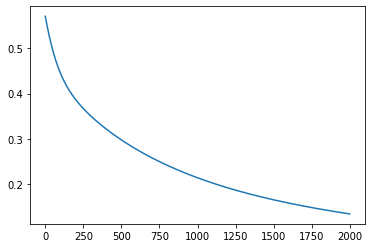

In [33]:
plt.plot(range(iters),J_his)
print(batch_w)

[-1.29794068  1.43861359 -1.71136132  3.41319603]


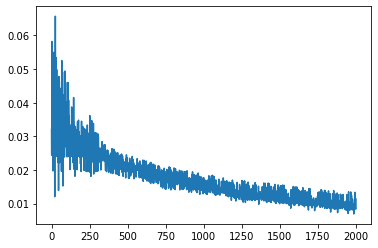

In [38]:
alpha = 0.02
iters = 2000
batch_size = 5
mini_batch_w, J_mini_batch = MB_gradient_descent(X_train, y_train, w, alpha, iters, batch_size)
plt.plot(range(iters),J_mini_batch)
print(mini_batch_w)

[-2.72888563  3.30116668 -4.82226998  8.52061421]


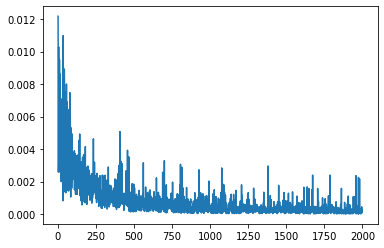

In [40]:
n_epochs = 2000
alpha = 0.2
w_n, J_sgd = stochastic_gradient_descent(X,y,w,alpha,n_epochs)
plt.plot(range(n_epochs),J_sgd)
print(w_n)


Now, we have run the model on our training data. Let us move to the test data.

In [42]:
z = np.dot(X_test, batch_w.T)
#z = np.dot(X_test, mini_batch_w.T)
#z = np.dot(X_test, w_n.T)
print(z)

[-1.39304578  2.31902593 -1.65527543  1.83982781  2.08973749  0.83627361
 -1.7989015   2.22020231  2.35077036  1.4420669   1.68645142  1.62489739
  1.92622823 -1.88769548 -1.4763146  -1.27803253 -2.25445001 -1.25015776
 -1.88410515 -1.51045258 -1.46702301  2.02772473 -1.46821979  1.63732059
 -1.37059294 -1.53786863 -1.77342028  1.50675254  1.46765135  2.67768565]


In [47]:
h = sigmoid(z)
y_pred = h>0.5 #evaluates logical condition on the right and stores FALSE or TRUE
y_pred = y_pred.astype(int) #converts the FALSE and TRUE to 0 and 1
print(y_pred)

[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1]


In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[15  0]
 [ 0 15]]


In [51]:
test_accuracy = np.sum(y_test == y_pred) / len(y_test)
print(test_accuracy)

1.0
